In [1]:
# Imports

import numpy as np
import librosa
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Configuration

# Input: Where your .wav files are
# NOTE: use the full path to the repository dataset/processed folder so paths resolve correctly when running
input_base = Path("C:/Users/danel/FYP/echocare-infant-cry-classification/dataset/processed")

# Output: Where spectrograms will be saved
output_base = Path("C:/Users/danel/FYP/echocare-infant-cry-classification/dataset/processed/mel-spectrograms")

# Spectrogram settings
sr = 16000          # Sample rate (same as .wav files)
n_mels = 128        # Number of mel bands
fmax = 8000         # Maximum frequency (Nyquist for 16kHz)
hop_length = 512    # Hop length for STFT

print("Configuration:")
print(f"  Sample rate: {sr} Hz")
print(f"  Mel bands: {n_mels}")
print(f"  Max frequency: {fmax} Hz")

Configuration:
  Sample rate: 16000 Hz
  Mel bands: 128
  Max frequency: 8000 Hz


In [3]:
# Helper Functions

def create_mel_spectrogram(audio_path, sr=16000, n_mels=128, fmax=8000, target_length=16000):
    """
    Creates mel-spectrogram from audio file and ensures fixed duration
    Returns mel_spec_db: Mel-spectrogram in dB scale (2D numpy array)
    """
    # Load audio
    audio, _ = librosa.load(audio_path, sr=sr, mono=True)
    
    # Ensure fixed length: Pad or truncate to exactly 1 second (16000 samples)
    if len(audio) < target_length:
        # Pad with zeros if too short
        audio = np.pad(audio, (0, target_length - len(audio)), mode='constant')
    elif len(audio) > target_length:
        # Truncate if too long
        audio = audio[:target_length]
    
    # Create mel-spectrogram
    mel_spec = librosa.feature.melspectrogram(
        y=audio,
        sr=sr,
        n_mels=n_mels,
        fmax=fmax,
        hop_length=hop_length
    )
    
    # Convert to dB scale
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    
    return mel_spec_db  # 2D array - grayscale (single channel)


def process_directory(input_dir, output_dir):
    """
    Process all .wav files in a directory, returns number of files processed
    """
    
    # Get all .wav files
    wav_files = list(input_dir.glob("*.wav"))
      
    for wav_file in wav_files:
        # Create spectrogram
        mel_spec = create_mel_spectrogram(wav_file, sr=sr, n_mels=n_mels, fmax=fmax)
        
        # Save as .npy file (same name, different extension)
        output_path = output_dir / f"{wav_file.stem}.npy"
        np.save(output_path, mel_spec)
    
    return len(wav_files)

print("Functions defined")

Functions defined


In [4]:
# process cry detection data

print("CREATING SPECTROGRAMS - CRY DETECTION")

# Training data
train_cry_count = process_directory(
    input_base / "cry_detection/train/cry",
    output_base / "cry_detection/train/cry"
)

train_non_cry_count = process_directory(
    input_base / "cry_detection/train/non-cry",
    output_base / "cry_detection/train/non-cry"
)

# Validation data
val_cry_count = process_directory(
    input_base / "cry_detection/validate/cry",
    output_base / "cry_detection/validate/cry"
)

val_non_cry_count = process_directory(
    input_base / "cry_detection/validate/non-cry",
    output_base / "cry_detection/validate/non-cry"
)

# Test data
test_cry_count = process_directory(
    input_base / "cry_detection/test/cry",
    output_base / "cry_detection/test/cry"
)

test_non_cry_count = process_directory(
    input_base / "cry_detection/test/non-cry",
    output_base / "cry_detection/test/non-cry"
)

print("\nCry Detection Spectrograms Created:")
print(f"   Train: {train_cry_count} cry + {train_non_cry_count} non-cry")
print(f"   Val:   {val_cry_count} cry + {val_non_cry_count} non-cry")
print(f"   Test:  {test_cry_count} cry + {test_non_cry_count} non-cry")

CREATING SPECTROGRAMS - CRY DETECTION

Cry Detection Spectrograms Created:
   Train: 734 cry + 1400 non-cry
   Val:   157 cry + 300 non-cry
   Test:  158 cry + 300 non-cry


In [5]:
# process cry classification data

print("CREATING SPECTROGRAMS - CRY CLASSIFICATION")

# Training data
train_hungry_count = process_directory(
    input_base / "cry_classification/train/hungry",
    output_base / "cry_classification/train/hungry"
)

train_pain_count = process_directory(
    input_base / "cry_classification/train/pain",
    output_base / "cry_classification/train/pain"
)

# Validation data
val_hungry_count = process_directory(
    input_base / "cry_classification/validate/hungry",
    output_base / "cry_classification/validate/hungry"
)

val_pain_count = process_directory(
    input_base / "cry_classification/validate/pain",
    output_base / "cry_classification/validate/pain"
)

# Test data
test_hungry_count = process_directory(
    input_base / "cry_classification/test/hungry",
    output_base / "cry_classification/test/hungry"
)

test_pain_count = process_directory(
    input_base / "cry_classification/test/pain",
    output_base / "cry_classification/test/pain"
)

print("\nCry Classification Spectrograms Created:")
print(f"   Train: {train_hungry_count} hungry + {train_pain_count} pain")
print(f"   Val:   {val_hungry_count} hungry + {val_pain_count} pain")
print(f"   Test:  {test_hungry_count} hungry + {test_pain_count} pain")

CREATING SPECTROGRAMS - CRY CLASSIFICATION

Cry Classification Spectrograms Created:
   Train: 245 hungry + 134 pain
   Val:   52 hungry + 29 pain
   Test:  53 hungry + 29 pain


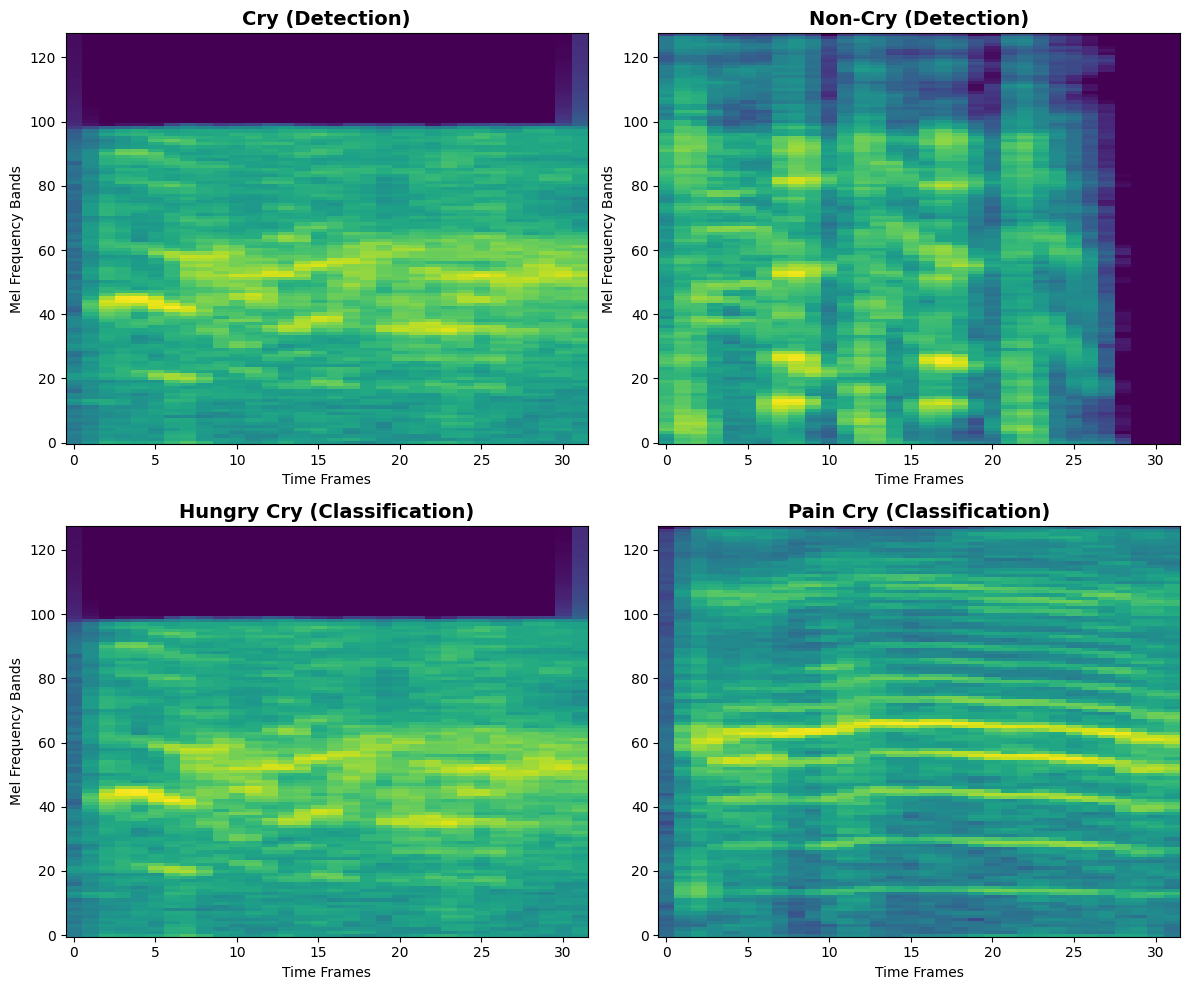


Spectrogram shapes:
  Cry: (128, 32)
  Non-Cry: (128, 32)
  Hungry: (128, 32)
  Pain: (128, 32)


In [6]:
# Visualise some sample spectrograms to check if data looks visually different

import matplotlib.pyplot as plt

# Load one example of each category: cry, non-cry, hungry, pain
cry_spec = np.load(output_base / "cry_detection/train/cry" / list((output_base / "cry_detection/train/cry").glob("*.npy"))[0])
non_cry_spec = np.load(output_base / "cry_detection/train/non-cry" / list((output_base / "cry_detection/train/non-cry").glob("*.npy"))[0])
hungry_spec = np.load(output_base / "cry_classification/train/hungry" / list((output_base / "cry_classification/train/hungry").glob("*.npy"))[0])
pain_spec = np.load(output_base / "cry_classification/train/pain" / list((output_base / "cry_classification/train/pain").glob("*.npy"))[0])

# Plot - Create 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Cry Spectrogram
axes[0, 0].imshow(cry_spec, aspect='auto', origin='lower', cmap='viridis')
axes[0, 0].set_title('Cry (Detection)', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Mel Frequency Bands')
axes[0, 0].set_xlabel('Time Frames')

# Plot Non-Cry Spectrogram
axes[0, 1].imshow(non_cry_spec, aspect='auto', origin='lower', cmap='viridis')
axes[0, 1].set_title('Non-Cry (Detection)', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Mel Frequency Bands')
axes[0, 1].set_xlabel('Time Frames')

# Plot Hungry Spectrogram
axes[1, 0].imshow(hungry_spec, aspect='auto', origin='lower', cmap='viridis')
axes[1, 0].set_title('Hungry Cry (Classification)', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Mel Frequency Bands')
axes[1, 0].set_xlabel('Time Frames')

# Plot Pain Spectrogram
axes[1, 1].imshow(pain_spec, aspect='auto', origin='lower', cmap='viridis')
axes[1, 1].set_title('Pain Cry (Classification)', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Mel Frequency Bands')
axes[1, 1].set_xlabel('Time Frames')

plt.tight_layout()
plt.show()

print(f"\nSpectrogram shapes:")
print(f"  Cry: {cry_spec.shape}")
print(f"  Non-Cry: {non_cry_spec.shape}")
print(f"  Hungry: {hungry_spec.shape}")
print(f"  Pain: {pain_spec.shape}")